In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
df_sector = pd.read_excel(r'C:\Users\a687u420\OneDrive - The University of Kansas\KU courses\Fall 2020\Project\Data\Carbon monitor\carbon-monitor-India.xlsx')
df_sector.head(10)

,country / group of countries,date,sector,MtCO2 per day
0,India,01/01/2019,Power,3.453448
1,India,02/01/2019,Power,3.497960
2,India,03/01/2019,Power,3.532581
3,India,04/01/2019,Power,3.572148
4,India,05/01/2019,Power,3.543710
5,India,06/01/2019,Power,3.368131
6,India,07/01/2019,Power,3.464576
7,India,08/01/2019,Power,3.589459
8,India,09/01/2019,Power,3.579567
9,India,10/01/2019,Power,3.590695


In [3]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country / group of countries  2738 non-null   object 
 1   date                          2735 non-null   object 
 2   sector                        2735 non-null   object 
 3   MtCO2 per day                 2735 non-null   float64
dtypes: float64(1), object(3)
memory usage: 85.8+ KB


In [4]:
df_sector.index=pd.to_datetime(df_sector.date,format='%d/%m/%Y')
df_sector = df_sector.set_index('date')
df_sector.index
df_sector.head(10)

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,India,Power,3.453448
02/01/2019,India,Power,3.497960
03/01/2019,India,Power,3.532581
04/01/2019,India,Power,3.572148
05/01/2019,India,Power,3.543710
06/01/2019,India,Power,3.368131
07/01/2019,India,Power,3.464576
08/01/2019,India,Power,3.589459
09/01/2019,India,Power,3.579567


In [5]:
ts = df_sector[pd.Series(pd.to_datetime(df_sector.index, errors='coerce')).notnull().values]
ts.head(15)

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,India,Power,3.453448
02/01/2019,India,Power,3.497960
03/01/2019,India,Power,3.532581
04/01/2019,India,Power,3.572148
05/01/2019,India,Power,3.543710
06/01/2019,India,Power,3.368131
07/01/2019,India,Power,3.464576
08/01/2019,India,Power,3.589459
09/01/2019,India,Power,3.579567


In [6]:
ts.dtypes

country / group of countries     object
sector                           object
MtCO2 per day                   float64
dtype: object

In [7]:
#ss = ts.copy(deep=True)
ts['MtCO2 per day'] = pd.to_numeric(ts['MtCO2 per day'] , errors='coerce')
ts.head(20)

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,India,Power,3.453448
02/01/2019,India,Power,3.497960
03/01/2019,India,Power,3.532581
04/01/2019,India,Power,3.572148
05/01/2019,India,Power,3.543710
06/01/2019,India,Power,3.368131
07/01/2019,India,Power,3.464576
08/01/2019,India,Power,3.589459
09/01/2019,India,Power,3.579567


In [8]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2735 entries, 01/01/2019 to 30/09/2020
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country / group of countries  2735 non-null   object 
 1   sector                        2735 non-null   object 
 2   MtCO2 per day                 2735 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.5+ KB


In [9]:
ts.dropna(inplace = True)

In [10]:
Energy_sources = ts.groupby('sector')
Energy_sources.head()

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,India,Power,3.453448
02/01/2019,India,Power,3.497960
03/01/2019,India,Power,3.532581
04/01/2019,India,Power,3.572148
05/01/2019,India,Power,3.543710
01/01/2019,India,Ground Transport,0.780439
02/01/2019,India,Ground Transport,0.797558
03/01/2019,India,Ground Transport,0.804692
04/01/2019,India,Ground Transport,0.805344


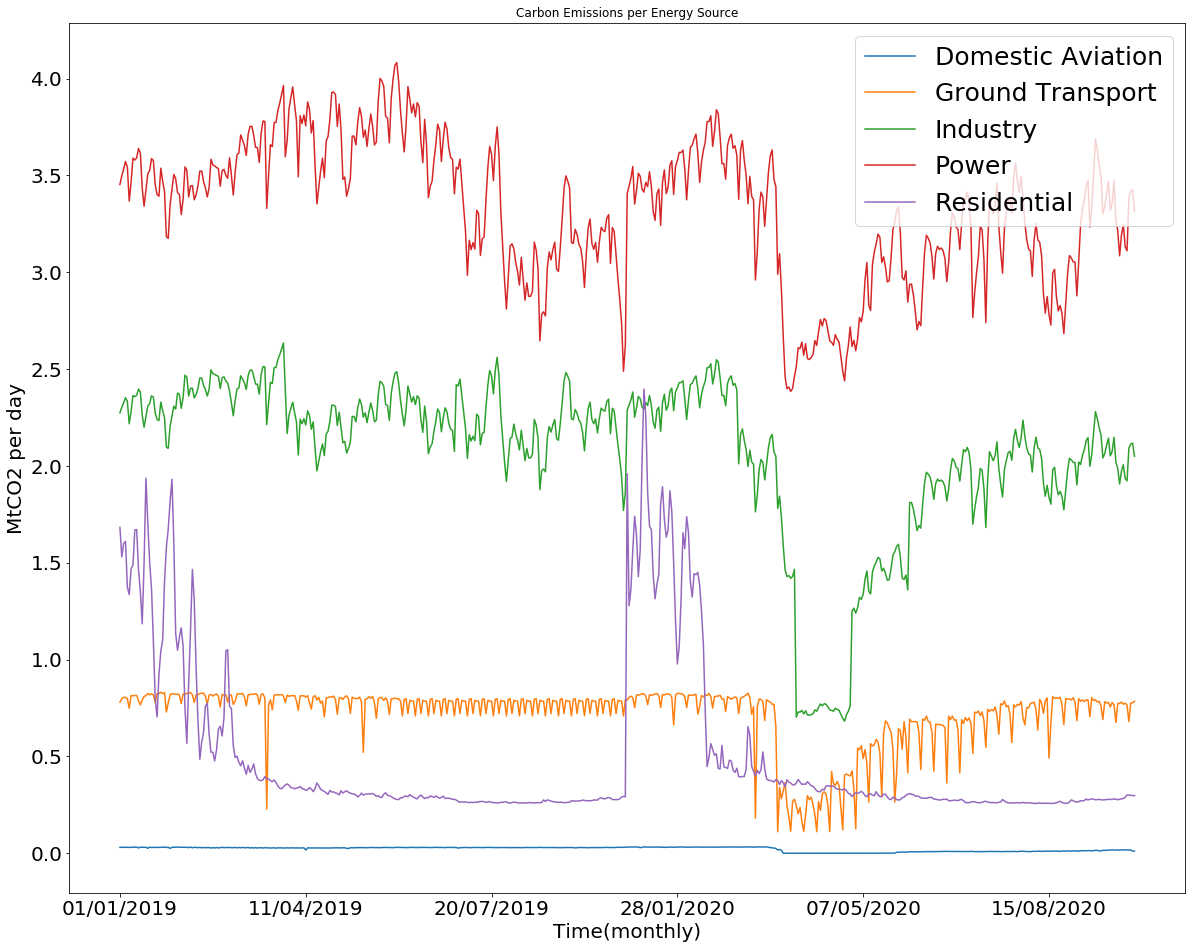

In [14]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='MtCO2 per day', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2 per day')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 25)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


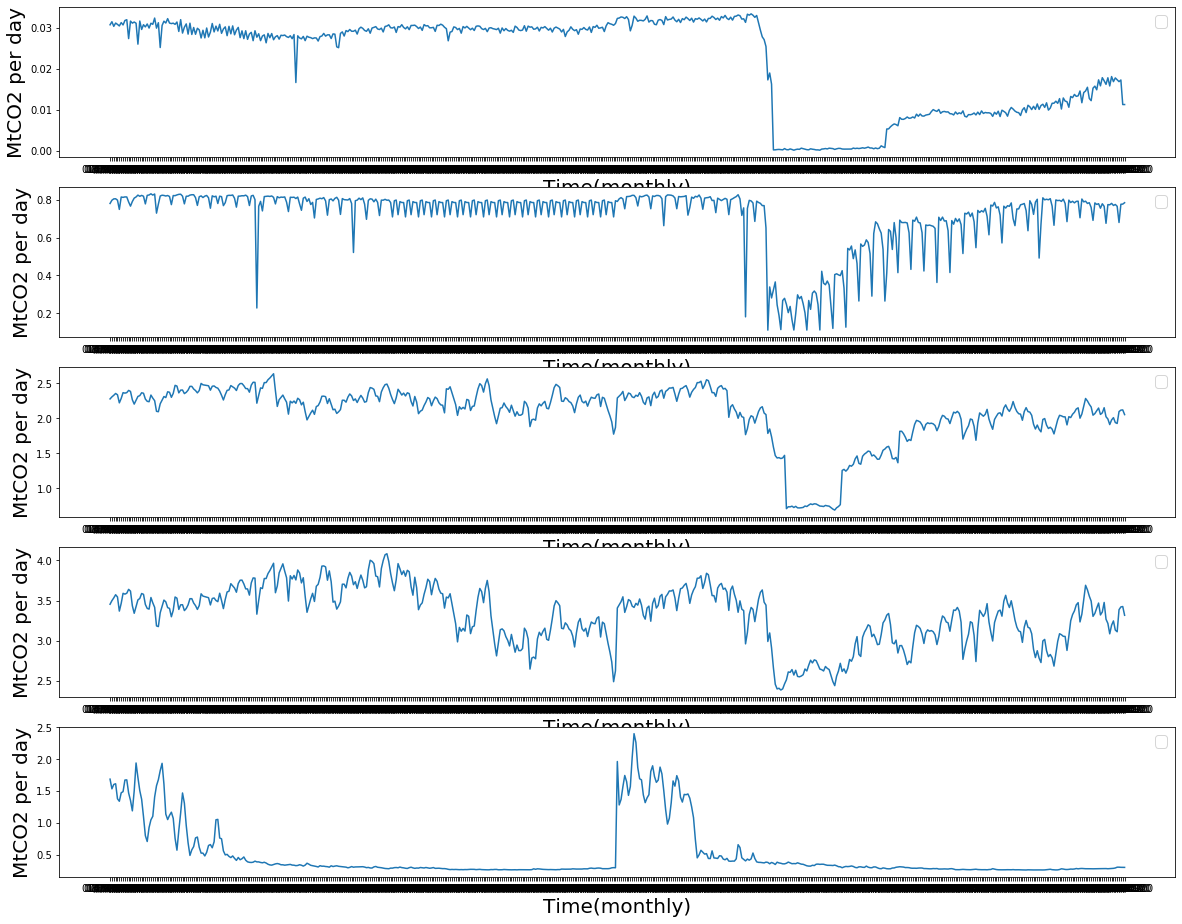

In [12]:
fig, ax = plt.subplots(5,1)
a = 0
for (desc, group) in Energy_sources:    
    ax[a].plot(group.index, group['MtCO2 per day'])
    ax[a].set_xlabel('Time(monthly)')
    ax[a].set_ylabel('MtCO2 per day')
    ax[a].xaxis.label.set_size(20)
    ax[a].yaxis.label.set_size(20)
    ax[a].legend(fontsize = 16)
    a = a+1
plt.show()